[E-02]regression :
 - 목적 : 사이킷런으로 머신러닝 모델을 구현하고 학습하여 회귀문제를 풀어보자.
 - 활용데이터 : diabetes, Bike Sharing Demand 
 - 과정 : 각 데이터에 주어진 모델, 손실함수, gradiant함수을 각각 적용하여 학습을 진행하고, 목표치에 달성하기 위한 과정을 거친다.
 - 목표 : [프로젝트1] MSE 손실함수값 3000 이하를 달성 / [프로젝트2] RMSE 값 150 이하를 달성
 
 ***

# 0. 공통 활용 모듈 import

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# 1. [프로젝트] 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

## (1) 데이터 가져오기

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## (2) 모델학습을 위한 입력 X,  예측 y 준비 및 train, test  분리하기

In [4]:
df_X = diabetes.data
df_y = diabetes.target
print(df_X.shape)
display(pd.DataFrame(df_X, columns=diabetes.feature_names))
print(df_y.shape)
display(pd.DataFrame(df_y, columns=['target']))

X_train, X_test, y_train, y_test = train_test_split(df_X, 
                                                    df_y, 
                                                    test_size=0.2, 
                                                    random_state=5) 

(442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


(442,)


,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


## (3) 모델 준비하기

In [5]:
def model(X, W, b):
    predictions = 0
    for i in range(X.shape[1]):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions


W = np.random.rand(10)
b = np.random.rand()


print('초기 가중치 설정 W:', W)
print('초기 bias 설정 b:', b)


초기 가중치 설정 W: [0.5786595  0.05715642 0.63638558 0.39239005 0.63506639 0.67045609
 0.35415698 0.13893788 0.98166675 0.48225796]
초기 bias 설정 b: 0.5491792483852532


## (4) 손실함수, loss 정의하기

In [6]:
def MSE(a,b):
    mse = ((a-b)**2).mean()
    return mse

def loss(X,W,b,y):
    predictions = model(X,W,b)
    Loss = MSE(predictions,y)
    return Loss

## (5) 기울기를 구하는 gradiant 함수 구현하기

In [7]:
def gradient(X,W,b,y):
    N = len(W)
    y_pred = model(X,W,b)
    
    dW = 1/N * 2 * (X.T).dot(y_pred-y)
    db = 2 * (y_pred-y).mean()
    return dW, db

## (6) 하이퍼 파라미터 설정하기

In [8]:
Learning_rate = 0.01

## (7) 모델 학습하기

In [10]:
losses = []

for i in range(5000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= Learning_rate * dW
    b -= Learning_rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('train %d th : Loss %0.4f' % (i,L))

train 0 th : Loss 27440.1640
train 100 th : Loss 4646.4590
train 200 th : Loss 3622.7969
train 300 th : Loss 3330.0220
train 400 th : Loss 3179.6725
train 500 th : Loss 3088.3845
train 600 th : Loss 3027.7092
train 700 th : Loss 2985.4297
train 800 th : Loss 2955.2508
train 900 th : Loss 2933.4217
train 1000 th : Loss 2917.4960
train 1100 th : Loss 2905.7989
train 1200 th : Loss 2897.1555
train 1300 th : Loss 2890.7305
train 1400 th : Loss 2885.9253
train 1500 th : Loss 2882.3084
train 1600 th : Loss 2879.5675
train 1700 th : Loss 2877.4751
train 1800 th : Loss 2875.8652
train 1900 th : Loss 2874.6161
train 2000 th : Loss 2873.6380
train 2100 th : Loss 2872.8646
train 2200 th : Loss 2872.2465
train 2300 th : Loss 2871.7469
train 2400 th : Loss 2871.3383
train 2500 th : Loss 2870.9998
train 2600 th : Loss 2870.7157
train 2700 th : Loss 2870.4741
train 2800 th : Loss 2870.2658
train 2900 th : Loss 2870.0837
train 3000 th : Loss 2869.9224
train 3100 th : Loss 2869.7777
train 3200 th : Los

## (8) test 데이터에 대한 성능 확인하기

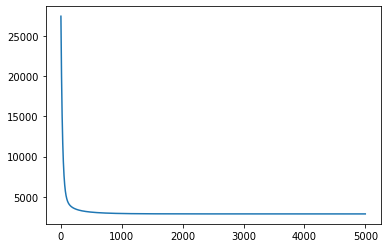

In [11]:
plt.plot(losses)
plt.show()

In [12]:
predictions = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print('모델 성능 결과 :', mse)
if mse < 3000:
    print('PASS')

모델 성능 결과 : 2989.468111249167
PASS


## (9) 정답데이터와 예측한 데이터 시각화 하기

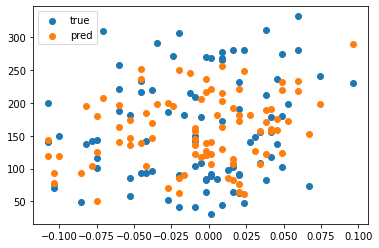

In [13]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

***

# 2. [프로젝트] 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## (1) 데이터 가져오기

In [14]:
bike = pd.read_csv('~/aiffel/bike_regression/data/bike-sharing-demand/train.csv')
print(bike.shape)
bike.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [15]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [16]:
bike['datetime'] = pd.to_datetime(bike['datetime'])

In [17]:
bike['year'] = bike['datetime'].dt.year
bike['month'] = bike['datetime'].dt.month
bike['day'] = bike['datetime'].dt.day
bike['hour'] = bike['datetime'].dt.hour
bike['minute'] = bike['datetime'].dt.minute
bike['second'] = bike['datetime'].dt.second

In [18]:
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

### 모든 datetime 은 minute, second 가 00,00으로 같다.  -> 의미없는 변수이다. 

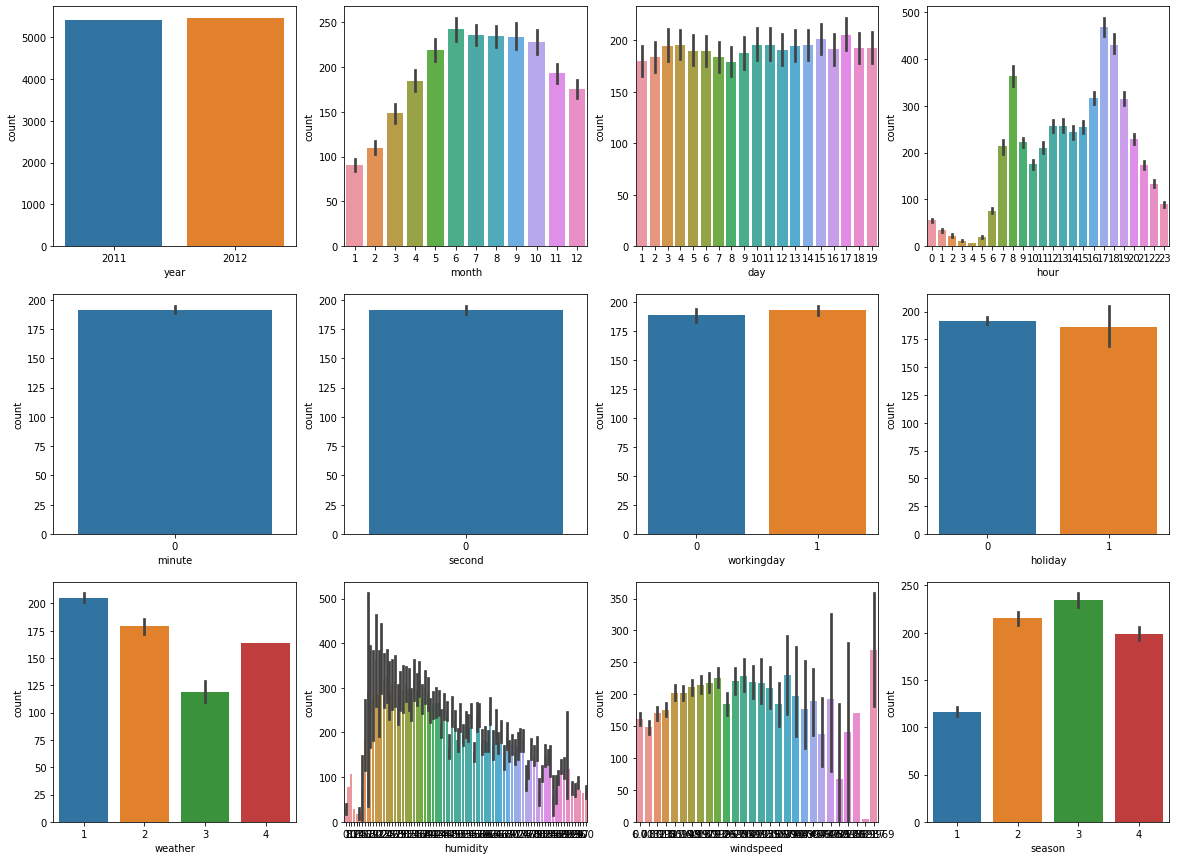

In [19]:
plt.figure(figsize=(20,15))
plt.subplot(3,4,1)
sns.countplot(x='year', data=bike)

plt.subplot(3,4,2)
sns.barplot(x='month', y='count', data=bike)

plt.subplot(3,4,3)
sns.barplot(x='day', y='count', data=bike)

plt.subplot(3,4,4)
sns.barplot(x='hour', y='count', data=bike)

plt.subplot(3,4,5)
sns.barplot(x='minute', y='count', data=bike)

plt.subplot(3,4,6)
sns.barplot(x='second', y='count', data=bike)

plt.subplot(3,4,7)
sns.barplot(x='workingday', y='count', data=bike)

plt.subplot(3,4,8)
sns.barplot(x='holiday', y='count', data=bike)

plt.subplot(3,4,9)
sns.barplot(x='weather', y='count', data=bike)

plt.subplot(3,4,10)
sns.barplot(x='humidity', y='count', data=bike)

plt.subplot(3,4,11)
sns.barplot(x='windspeed', y='count', data=bike)

plt.subplot(3,4,12)
sns.barplot(x='season', y='count', data=bike)

plt.show()

## (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [20]:
# 컬럼 확인 
bike.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

#### 위 시각화한 그래프를 볼때, minute second 는 무조건 제외할 컬럼인 것을 알 수 있다.  -- > X1
#### workingday, holiday 또한 크게 count 변화가 없으므로 제거하는 test 를 한다.  --> X2

In [21]:
X1 = bike[['season', 'weather', 'temp','atemp', 'humidity', 'windspeed', 
               'holiday', 'workingday', 'year', 'month', 'day', 'hour' ]]
X2 = bike[['season', 'weather', 'temp','atemp', 'humidity', 'windspeed', 
                'year','month', 'day', 'hour' ]]
y = bike[['count']]

In [25]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=12)

## (5) LinearRegression 모델 학습

In [26]:
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [27]:
from sklearn.metrics import mean_squared_error

predictions1 = model1.predict(X1_test)
rmse1 = mean_squared_error(y1_test, predictions1, squared = False)
print('모델 성능 결과 :', rmse1)
if rmse1 < 150:
    print('PASS')
    
    
predictions2 = model2.predict(X2_test)
rmse2 = mean_squared_error(y2_test, predictions2, squared = False)
print('모델 성능 결과 :', rmse2)
if rmse2 < 150:
    print('PASS')

모델 성능 결과 : 142.92731602610294
PASS
모델 성능 결과 : 143.3876162791049
PASS


## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

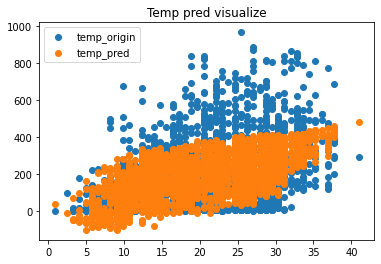

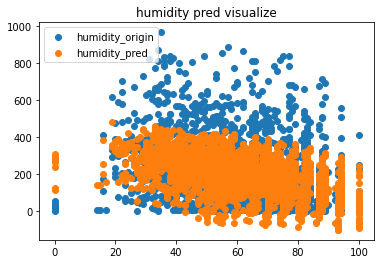

In [28]:
X1_test['prediction'] = predictions1

plt.scatter(X1_test['temp'], y1_test, label = "temp_origin") 
plt.scatter(X1_test['temp'], X1_test["prediction"], label = "temp_pred") 
plt.title('Temp pred visualize')
plt.legend()
plt.show()

plt.scatter(X1_test['humidity'], y1_test, label = "humidity_origin") 
plt.scatter(X1_test['humidity'], X1_test["prediction"], label = "humidity_pred")
plt.title('humidity pred visualize')
plt.legend()
plt.show()

# 3. 회고

- 컬럼마다 시각화를 했을 때 관련 없다고 생각했던 feature도 중요 변수로 작용하고 있었다. 데이터 EDA 에서 더 자세하게 살펴봐야한다고 생각했다. 
- bike 데이터에서 10000개가 넘는 데이터라 마지막 시각화 결과가 예측이 어느정도 되었다고 결론 내렸으나, 오차가 굉장히 심하다고 생각한다.
- 모델 학습보다 결국 데이터가 99% 이구나를 느꼈다. 어떻게 feature를 뽑아내는지에 따라 결과가 많이 달라질 것으로 보인다. 
- 모델 학습이 잘 되었다 라고 판단하는 적정수준을 어떻게 정할지 아직 의문이다. (문제에서 150 미만이라고 하였지만, 실제 잘되었다고 생각하지 않는다)
- 이번 프로젝트를 하면서 점점 시각화에 익숙해지는 느낌을(아직 멀었지만) 받아서 기뻤다. 